In [50]:
from SOM_plus_clustering.som import SOM
import pandas as pd
import numpy as np
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

from torchinfo import summary

In [51]:
df = pd.read_csv("labeled_data.csv")
df.drop("label", axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df

,"('N', 'H', 1)","('N', 'N', 1)","('N', 'N', 1.5)","('S', 'O', 1)","('N', 'C', 1)","('N', 'C', 1.5)","('N', 'S', 1)","('C', 'N', 3)","('S', 'H', 1)","('C', 'S', 1)",...,nitroso,phospate,phospite,isothio,thioamide,aromatic,cycle,weight,logP,SAS
0,2,1,0,0,7,2,0,0,0,0,...,0,0,0,0,0,1,2,286.3836,3.11370,3.432004
1,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,2,2,329.2911,2.37940,2.733200
2,1,0,0,0,4,0,1,0,0,1,...,0,0,0,0,0,2,1,358.4094,2.69566,2.595621
3,1,0,0,0,2,2,0,1,0,0,...,0,0,0,0,0,2,2,275.3347,3.26928,3.918602
4,1,0,0,0,2,5,0,0,0,0,...,0,0,0,0,0,2,1,329.3521,1.79382,3.449086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62358,2,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,2,2,308.3226,2.48560,3.638997
62359,1,0,0,0,3,3,0,0,1,0,...,0,0,0,0,0,2,2,335.4299,2.11680,4.320638
62360,1,0,1,0,3,2,0,0,0,0,...,0,0,0,0,0,2,1,371.2442,2.87480,4.217729
62362,1,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,2,0,296.3316,2.90054,1.840642


In [52]:
normalized_df = df
normalized_df = (normalized_df - normalized_df.mean())/normalized_df.std()
normalized_df.dropna(axis=1, inplace=True)
df_cleaned = normalized_df
df_cleaned = df_cleaned[df_cleaned < 3].dropna()
df_cleaned = (df_cleaned-df_cleaned.min())/(df_cleaned.max()-df_cleaned.min())
df_cleaned.dropna(axis=1, inplace=True)
df_cleaned

,"('N', 'H', 1)","('N', 'N', 1)","('N', 'C', 1)","('N', 'C', 1.5)","('S', 'H', 1)","('C', 'S', 1)","('C', 'S', 1.5)","('F', 'C', 1)","('C', 'O', 2)","('C', 'Cl', 1)",...,alcohol,ether,aldehyde,haloalkene,sulfoxide,aromatic,cycle,weight,logP,SAS
0,0.50,1.0,0.636364,0.5,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.333333,0.666667,0.384999,0.684217,0.511276
1,0.00,0.0,0.272727,0.0,0.0,0.0,0.0,1.0,0.333333,0.0,...,1.0,0.0,0.333333,0.0,0.0,0.666667,0.666667,0.593616,0.550946,0.342098
8,0.50,1.0,0.727273,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,...,0.0,0.0,0.666667,0.0,0.0,0.000000,0.666667,0.350699,0.298214,0.430993
10,0.50,1.0,0.454545,0.0,0.0,0.0,0.0,0.5,0.333333,0.0,...,0.0,0.0,0.333333,0.0,0.0,0.333333,0.333333,0.404169,0.692461,0.408234
11,0.75,1.0,0.636364,0.5,0.0,0.0,0.0,0.0,0.333333,1.0,...,0.0,0.5,0.333333,1.0,0.0,0.333333,0.666667,0.629950,0.592744,0.478543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62349,0.25,0.0,0.181818,1.0,0.0,0.0,0.0,0.5,0.333333,0.0,...,0.0,0.0,0.333333,0.0,0.0,0.666667,0.000000,0.321274,0.540764,0.261976
62351,0.25,0.0,0.727273,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,...,0.0,0.5,0.666667,0.0,0.0,0.333333,0.666667,0.671907,0.760536,0.494526
62354,0.75,0.0,0.545455,0.0,1.0,0.0,1.0,0.0,0.666667,0.0,...,0.0,0.5,0.666667,0.0,0.0,0.666667,0.333333,0.676704,0.660169,0.293487
62362,0.25,0.0,0.454545,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,...,0.0,0.0,0.666667,0.0,0.0,0.666667,0.000000,0.433366,0.645530,0.126014


In [53]:
X = df_cleaned.values
X.shape

(29984, 34)

In [54]:
if torch.cuda.is_available(): 
    dev = "cuda:0" 
else: 
    dev = "cpu" 
device = torch.device(dev) 
print("using", device)
torch.backends.cudnn.benchmark = True

using cuda:0


In [55]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim):
        super(Model, self).__init__()
        # encoding layer
        self.encoderlayer1 = nn.Linear(input_size, hidden_dim, bias=True)
        self.encoderlayer2 = nn.Linear(hidden_dim, int(hidden_dim/2), bias=True)
        self.encoderlayer3 = nn.Linear(int(hidden_dim/2), int(hidden_dim/4), bias=True)
        self.encoderlayer4 = nn.Linear(int(hidden_dim/4), int(hidden_dim/8), bias=True)
        self.encoderoutput = nn.Linear(int(hidden_dim/8), output_size, bias=True)
        
        # decode layer
        self.decodelayer1 = nn.Linear(output_size, int(hidden_dim/8), bias=True)
        self.decodelayer2 = nn.Linear(int(hidden_dim/8), int(hidden_dim/4), bias=True)
        self.decodelayer3 = nn.Linear(int(hidden_dim/4), int(hidden_dim/2), bias=True)
        self.decodelayer4 = nn.Linear(int(hidden_dim/2), int(hidden_dim), bias=True)
        self.decodeoutput = nn.Linear(int(hidden_dim), input_size, bias=True)
        
    def forward(self,x):
        x = self.encoderlayer1(x)
        x = self.encoderlayer2(x)
        x = self.encoderlayer3(x)
        x = self.encoderlayer4(x)
        x = self.encoderoutput(x)
        x = self.decodelayer1(x)
        x = self.decodelayer2(x)
        x = self.decodelayer3(x)
        x = self.decodelayer4(x)
        x = self.decodeoutput(x)
        return x
    
    def encode(self,x):
        x = self.encoderlayer1(x)
        x = self.encoderlayer2(x)
        x = self.encoderlayer3(x)
        x = self.encoderlayer4(x)
        x = self.encoderoutput(x)
        return x
    
    def decode(self,x):
        x = self.decodelayer1(x)
        x = self.decodelayer2(x)
        x = self.decodelayer3(x)
        x = self.decodelayer4(x)
        x = self.decodeoutput(x)
        return x

In [56]:
tensor_x_train = torch.tensor(X).to(device)
tensor_y_train = torch.tensor(X).to(device)

In [57]:
input_size = tensor_x_train.shape[1]
hidden_dim = 2048
batch_size = 32
learning_rate = 1e-3
output_size = 3
input_size, output_size

(34, 3)

In [58]:
# compile model
model = Model(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
training_loader = data.DataLoader(data.TensorDataset(tensor_x_train, tensor_y_train), shuffle=True, batch_size=batch_size)
#scheduler = StepLR(optimizer, step_size=100, gamma=0.1)

# this is for classification
loss_fn = nn.CrossEntropyLoss().to(device) # sparse categorical cross entropy

In [59]:
summary(model, input_size=(batch_size, input_size))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [32, 34]                  --
├─Linear: 1-1                            [32, 2048]                71,680
├─Linear: 1-2                            [32, 1024]                2,098,176
├─Linear: 1-3                            [32, 512]                 524,800
├─Linear: 1-4                            [32, 256]                 131,328
├─Linear: 1-5                            [32, 3]                   771
├─Linear: 1-6                            [32, 256]                 1,024
├─Linear: 1-7                            [32, 512]                 131,584
├─Linear: 1-8                            [32, 1024]                525,312
├─Linear: 1-9                            [32, 2048]                2,099,200
├─Linear: 1-10                           [32, 34]                  69,666
Total params: 5,653,541
Trainable params: 5,653,541
Non-trainable params: 0
Total mult-adds (M): 180.91
Input

In [60]:
def train_one_epoch():
    step_loss = 0
    running_loss = 0
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        
        # Make predictions for this batch
        outputs = model(inputs.cuda().float())

        # for classification: convert labels to long tensor
        labels = labels.cuda().float()
        
        # for predicition: convert labels to float tensor
        #labels = torch.reshape(labels.cuda().float(), (-1,1))
        
        # Compute the loss and its gradients
        # Zero your gradients for every batch!
        optimizer.zero_grad()
        #print(outputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        # Adjust learning weights
        optimizer.step()
        #scheduler.step()
        
        # Gather data loss and accuracy
        running_loss += loss.item()
    
    step_loss = (running_loss/len(training_loader))
        # print('  STEP {} loss: {}, accuracy: {}'.format(steps+1, running_loss/len(training_loader), running_acc/len(training_loader)))
    return step_loss

In [61]:
class history:
    def __init__(self):
        self.train_loss = []
        self.train_acc = []
        self.val_loss = []
        self.val_acc = []
        self.times = []
    def add_history(self, train_loss, train_acc, val_loss, val_acc, time_spent):
        self.train_loss.append(train_loss)
        self.train_acc.append(train_acc)
        self.val_loss.append(val_loss)
        self.val_acc.append(val_acc)
        self.times.append(time_spent)

In [62]:
h = history()
best_loss = 1_000_000.
ticker = 0 
best_model = None

In [63]:
import time
"""WHY THE FUCKING LOSS IS NEGATIVE, IT SHOULD NOT BE LIKE THAT"""
epoch_number = 0
EPOCHS = 1000
for epoch in range(EPOCHS):
    start_time = time.time()
    print('EPOCH {}/{}:'.format(epoch_number + 1, EPOCHS))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train()
    avg_loss = train_one_epoch()
    print('loss: {}, time:{}'.format(avg_loss, (time.time() - start_time)))
    
    # add history 
    h.add_history(avg_loss, 0, 0, 0, (time.time() - start_time))
    
    epoch_number += 1
    
torch.save(model.state_dict(), "encoder_model")

EPOCH 1/1000:
loss: 32.393566675094554, time:3.9226629734039307
EPOCH 2/1000:


KeyboardInterrupt: 

In [66]:
input_size = tensor_x_train.shape[1]
hidden_dim = 2048
batch_size = 64
output_size = 3
input_size, output_size
load_model = Model(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim).to(device)
load_model.load_state_dict(torch.load("encoder_model"))
model.eval()

Model(
  (encoderlayer1): Linear(in_features=34, out_features=2048, bias=True)
  (encoderlayer2): Linear(in_features=2048, out_features=1024, bias=True)
  (encoderlayer3): Linear(in_features=1024, out_features=512, bias=True)
  (encoderlayer4): Linear(in_features=512, out_features=256, bias=True)
  (encoderoutput): Linear(in_features=256, out_features=3, bias=True)
  (decodelayer1): Linear(in_features=3, out_features=256, bias=True)
  (decodelayer2): Linear(in_features=256, out_features=512, bias=True)
  (decodelayer3): Linear(in_features=512, out_features=1024, bias=True)
  (decodelayer4): Linear(in_features=1024, out_features=2048, bias=True)
  (decodeoutput): Linear(in_features=2048, out_features=34, bias=True)
)

In [67]:
data = tensor_x_train.cuda().float()
print(np.array(model.encode(data).tolist()).shape)
print(np.array(model.decode(model.encode(data)).tolist()).shape)

(29984, 3)
(29984, 34)


In [68]:
encoded_data = np.array(model.encode(data).tolist())
encoded_data.shape

(29984, 3)

In [91]:
som_model = SOM(2,3, encoded_data.shape[1],
                initiate_method="SOM++", learning_rate=0.7, neighbour_rad=1.5)
som_model.fit(encoded_data,3000)
pred = som_model.predict(encoded_data)

Training   | [███████████████████████████████████████ ] 99% 

In [92]:
decoded_centre = model.decode(torch.tensor(som_model.cluster_center_).to(device).float())

In [93]:
som_model.cluster_center_

array([[-0.62271839,  0.73587207, -0.63903368],
       [ 0.23169126, -0.08420736, -0.26418317],
       [-1.18884446, -0.23485565,  1.16492944],
       [-0.03447136,  0.54428579,  0.29535359],
       [-0.59112413, -0.70740182, -0.29136362],
       [ 0.6778963 ,  0.72513175, -1.17868094]])

In [94]:
import seaborn as sns

In [95]:
d = pd.DataFrame(encoded_data)
d['label'] = pred

In [96]:
d

,0,1,2,label
0,-0.526226,-0.358073,1.657519,2
1,-0.777349,0.811677,0.866587,2
2,-0.981230,0.657083,1.039131,2
3,-0.474553,-0.239078,0.092566,3
4,-0.737718,0.792893,-0.675871,0
...,...,...,...,...
29979,0.214298,0.761764,1.075215,2
29980,-1.239213,-0.378712,-0.131584,3
29981,-0.418132,-0.094660,-0.071455,3
29982,0.219472,0.963338,-0.679141,4


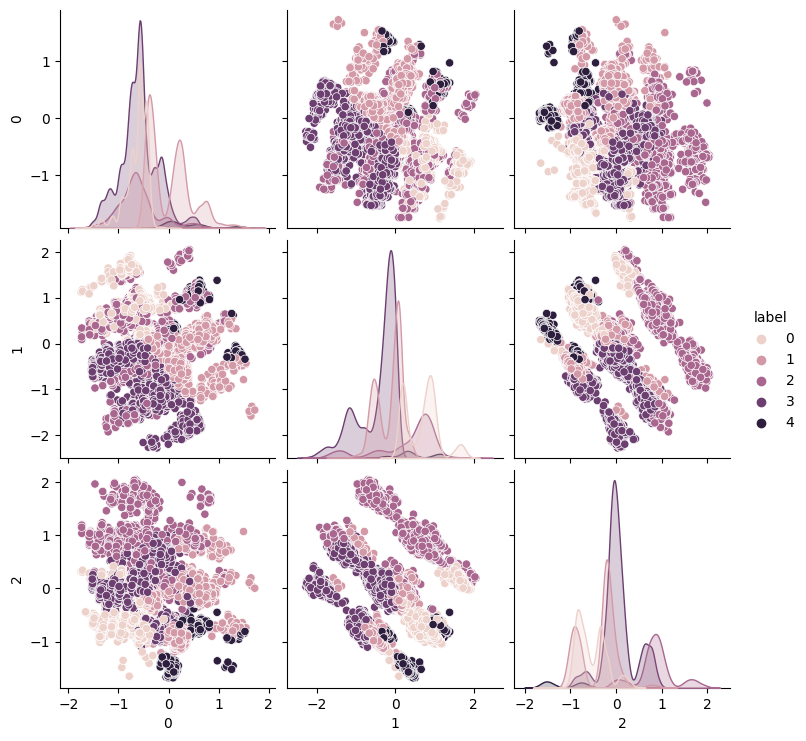

In [97]:
sns.pairplot(d, hue='label', corner=False)

In [98]:
np.save("cluster_center", som_model.cluster_center_, )

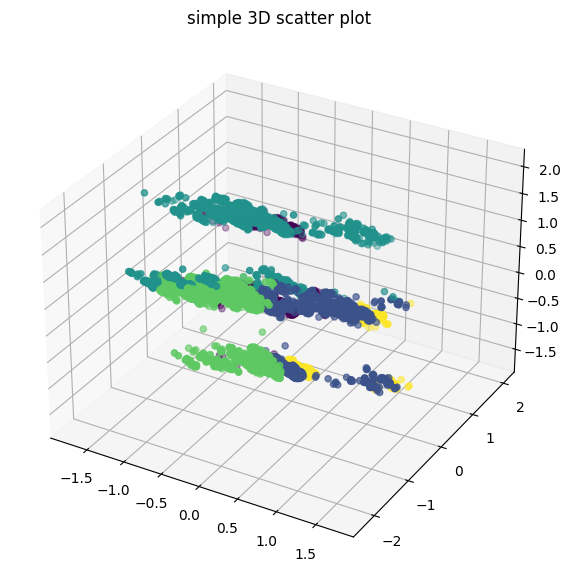

In [99]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = d[2]
x = d[0]
y = d[1]
labels = d["label"]
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, c=labels)
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()